# Regression: Long Short-Term Memory Networks

To predict the number of passengers of an airline in a particular month, based on its previous month value, using the LSTM network.
<br>
Data source: https://www.kaggle.com/chirag19/air-passengers
<br>
Reference for this tutorial: https://kgptalkie.com/airline-passenger-prediction-using-rnn-lstm/

Concepts:
- Classification vs regression, image vs time series data.
- Recurrent neural network.
- LSTM components: input, output, forget gates.

# Install and Import Modules

In [1]:
!pip install --upgrade tensorflow
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Dataset and Preprocess Data

In [3]:
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset.shape

(144, 2)

In [5]:
dataset_passengers = dataset['#Passengers']
dataset_passengers.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [6]:
# convert to numpy array

dataset_passengers = np.array(dataset_passengers).reshape(-1,1)
dataset_passengers

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

Text(0, 0.5, 'Number of Passengers')

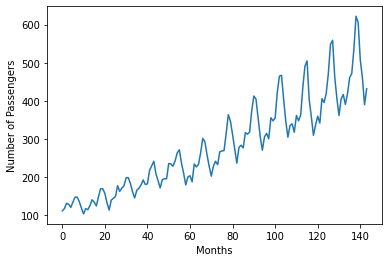

In [7]:
# plot passengers

plt.plot(dataset_passengers)
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

In [25]:
# scale the range of values with range 0-1

scaler = MinMaxScaler()
dataset_passengers = scaler.fit_transform(dataset_passengers)
dataset_passengers.min(), dataset_passengers.max()

(0.0, 1.0)

In [9]:
# train test split. First 100 months = train set. 101 months onwards = test set.

train_size = 100

train = dataset_passengers[:train_size, :]
print(f"Train set shape: {train.shape}")

test = dataset_passengers[train_size:, :]
print(f"Test set shape: {test.shape}")

Train set shape: (100, 1)
Test set shape: (44, 1)


In [10]:
# make X and y. Given number of passenger on month x, predict number of passenger on month x+1.
# for train with shape 100: X = index 0 -> 98, y = index 1 -> 99.
# single: X = index 0, y = index 1, continue for the whole array.

X_train, y_train = [], []

for i in range(len(train)-2):
    X_train.append(train[i:i+1, 0])  # single value 
    y_train.append(train[i+1, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
print(f"X_train[0] = {X_train[0]}\nX_train shape = {X_train.shape}")
print(f"y_train[0] = {y_train[0]}\ny_train shape = {y_train.shape}")

print(f"X_train[1] = {X_train[1]}\nX_train shape = {X_train.shape}")
print(f"y_train[1] = {y_train[1]}\ny_train shape = {y_train.shape}")

X_train[0] = [0.01544402]
X_train shape = (98, 1)
y_train[0] = 0.02702702702702703
y_train shape = (98,)
X_train[1] = [0.02702703]
X_train shape = (98, 1)
y_train[1] = 0.05405405405405403
y_train shape = (98,)


In [12]:
# do the same thing with test set

X_test, y_test = [], []

for i in range(len(test)-2):
    X_test.append(test[i:i+1, 0])  # single value 
    y_test.append(test[i+1, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
print(f"X_test[0] = {X_test[0]}\nX_test shape = {X_test.shape}")
print(f"y_test[0] = {y_test[0]}\ny_test shape = {y_test.shape}")

print(f"X_test[1] = {X_test[1]}\nX_test shape = {X_test.shape}")
print(f"y_test[1] = {y_test[1]}\ny_test shape = {y_test.shape}")

X_test[0] = [0.48455598]
X_test shape = (42, 1)
y_test[0] = 0.6138996138996139
y_test shape = (42,)
X_test[1] = [0.61389961]
X_test shape = (42, 1)
y_test[1] = 0.6969111969111969
y_test shape = (42,)


In [14]:
# make input data three dimensional for neural network
# train: (98, 1) -> (98, 1, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train.shape = {X_train.shape}\nX_test.shape = {X_test.shape}")

X_train.shape = (98, 1, 1)
X_test.shape = (42, 1, 1)


# Train and Evaluate an LSTM Model

In [15]:
model = Sequential()
model.add(LSTM(5, input_shape=(1,1)))
model.add(Dense(1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
epochs = 50
batch_size = 1

history = model.fit(X_train, y_train, epochs=epochs, batch_size=1)

Epoch 1/50
4/4 [==============================] - 3s 3ms/step - loss: 0.0747
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0678
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0647
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0617
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0589
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0561
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0537
Epoch 9/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0513
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 13/50
4/4 [==============================] - 0s 5ms/step - loss: 0.

In [19]:
# test with test data

y_pred = model.predict(X_test)

In [20]:
# denormalize test result and ground truth

y_pred = scaler.inverse_transform(y_pred)

y_test = np.array(y_test).reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [21]:
y_pred

array([[227.96916],
       [234.86996],
       [239.17169],
       [239.36893],
       [233.03737],
       [227.13231],
       [222.70622],
       [225.97803],
       [226.39822],
       [224.08128],
       [228.69948],
       [227.23705],
       [228.80365],
       [236.18231],
       [241.71454],
       [243.06392],
       [233.03737],
       [228.3867 ],
       [223.23553],
       [226.08313],
       [228.491  ],
       [226.60811],
       [233.24182],
       [232.21744],
       [234.6672 ],
       [239.86086],
       [247.11525],
       [248.12791],
       [238.97418],
       [233.34398],
       [228.69948],
       [233.13962],
       [234.36267],
       [231.7034 ],
       [234.56573],
       [238.7764 ],
       [239.86086],
       [245.90579],
       [253.72816],
       [252.339  ],
       [243.35121],
       [238.7764 ]], dtype=float32)

In [22]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

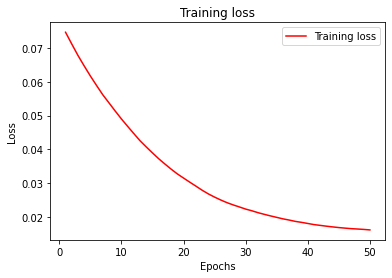

In [23]:
# plot loss

loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, color='red', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

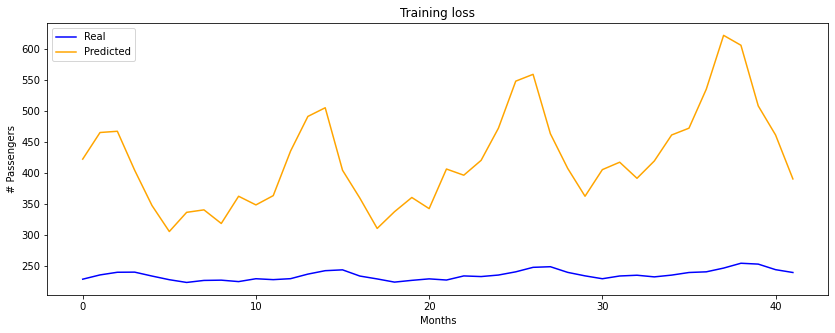

In [24]:
# plot prediction compared with ground truth

plt.figure(figsize=(14, 5))
plt.plot(y_pred, color='blue', label='Real')
plt.plot(y_test, color='orange', label='Predicted')
plt.title('Training loss')
plt.xlabel('Months')
plt.ylabel('# Passengers')
plt.legend()
plt.show()